# Run time analysis of Gauss-Siedel and Jacobi methods for larger systems
The goal of this analysis is to address the runtimes for both Jacobi and Gauss Siedel as we scale the size of the model system.
## Methodology
Since we are attempting to find our solution iteratively, we start with an initial guess and iterate until the solution is within tolerance. Thanks to convergence theorems, we expect the sequence to approach the true solution over for sufficient iterations. Runtime of each method is proportional to the number of iterations needed to run by each algorithm. If you start with a guess that is close to the final solution, the number of iterations necessary to reach your tolerance, will decrease (and increase if your intial guess is far away). Thus, runtime depends on the initial guess. 

But, the purpose of this analysis is to see how the size of the system affects duration of the algorithm. So, we will fix our initial guess to remove this effect.
### Constraining the Initial Guess
Since the system of interest represents the temperature distribution of the plate at the equilibrium state, the we expect that the average value of the solution vector to be remain roughly unchanged as the system grows. It is possible that the average value may deviate slightly as the system scales, but this will be advantageous for our use case.

We will use the average value of the solution vector for a small system and use that to modify the initial guess for each of the following systems. Effectively, we get an initial guess vector close to the final solution, but different enough that the system will still iterate. Then, the impact of the guess on runtime will be quite small making the analysis a better measure of how the scale of the system affects the duration of the runs.

We start with a small system:

In [19]:
import HeatModel
import numpy as np
import timeit
import matplotlib.pyplot as plt

In [11]:
initialGuessSystem = HeatModel.HeatModel(5)

solutionTuple = initialGuessSystem.solveJacobi(nIter=500,tol=1e-9)

initialGuess = np.average(solutionTuple[0])
initialGuess

49.99999976019476

### Setting up the analysis
Now, with our initial guess constrained, we will: define a set of system sizes to collect our data, add a list to store the elapsed time for plotting later, loop through the system sizes, and store the results.

In [7]:
size = 4

maxIter = 40000

TOL = 1e-5

testSystem = HeatModel.HeatModel(size)
    
startTime = timeit.default_timer()
    
solution, iters, tols = testSystem.solveJacobi(maxIter,TOL,x0=initialGuess)
    
elapsedTime = timeit.default_timer() - startTime

with open("dataFile.txt",'a') as outFile:

    outFile.write(str(elapsedTime))
    
    outFile.write("," + str(size)+ "," +str(iters)+ "," +str(tols))
    
    outFile.write("\n")
    


In [8]:
size = 1000

maxIter = 40000

TOL = 1e-5

testSystem = HeatModel.HeatModel(size)
    
startTime = timeit.default_timer()
    
solution, iters, tols = testSystem.GaussSeidel(maxIter,TOL,x0=initialGuess)
    
elapsedTime = timeit.default_timer() - startTime

with open("dataFile.txt",'a') as outFile:

    outFile.write(str(elapsedTime))
    
    outFile.write("," + str(size)+ "," +str(iters)+ "," +str(tols)+ ",GS")
    
    outFile.write("\n")
    

KeyboardInterrupt: 

I have been having trouble running the GS method for a system of size 1000. We know that the method is largely dependent on the initial guess. Our initial analysis indicates that the Jacobi method is running in fewer iterations. I am going to run the same technique where I find a solution and average the value, but I will start with an initial guess coming from the jacobi method for the system of the same size.  

In [12]:
size = 100

maxIter = 40000

TOL = 1e-5

testSystem = HeatModel.HeatModel(size)

#feederSolution = testSystem.solveJacobi(maxIter,TOL, x0=initialGuess)

#initialGuess = np.mean(feederSolution[0])
    
startTime = timeit.default_timer()
    
solution, iters, tols = testSystem.solveJacobi(maxIter,TOL,x0=initialGuess)
    
elapsedTime = timeit.default_timer() - startTime

with open("dataFile.txt",'a') as outFile:

    outFile.write(str(elapsedTime))
    
    outFile.write("," + str(size)+ "," +str(iters))
    
    outFile.write("\n")

Now that our test are done, I need to do some processing to pull relevant data from the file data file

[0.00474162504542619, 0.21929783304221928, 154.56196058297064] [0.05082137498538941, 81.19101574993692, 55956.84321958409]


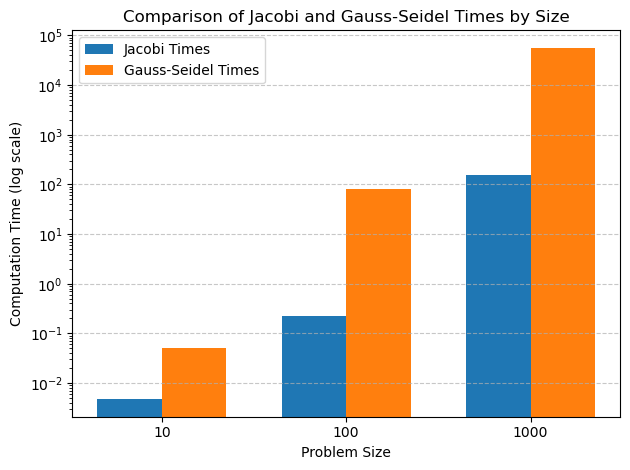

In [33]:
jacobiData = []
guassSiedelData = []

with open("dataFile.txt",'r') as inFile:
    
    for line in inFile.readlines():
        if 'GS' not in line:
            duration,size,convergenceIters = line.split(',')
            jacobiData.append((float(duration),int(size),int(convergenceIters)))

        else:
            duration, size, convergenceIters, method = line.split(',')
            guassSiedelData.append((float(duration),int(size),int(convergenceIters)))

#print(jacobiData,guassSiedelData)
jacobiTimes = [y[0] for y in jacobiData]
jacobiSizes = [x[1] for x in jacobiData]
jacobiIters = [z[2] for z in jacobiData]

gsTimes = [y[0] for y in guassSiedelData]
gsIters = [z[2] for z in guassSiedelData]

print(jacobiTimes,gsTimes)

#bar chart
# Set up bar positions
x = np.arange(len(jacobiSizes))  # Positions for groups
width = 0.35  # Width of each bar

# Create bar chart
plt.bar(x - width/2, jacobiTimes, width, label='Jacobi Times')
plt.bar(x + width/2, gsTimes, width, label='Gauss-Seidel Times')


plt.yscale('log')


plt.xlabel('Problem Size')
plt.ylabel('Computation Time (log scale)')
plt.title('Comparison of Jacobi and Gauss-Seidel Times by Size')
plt.xticks(x, jacobiSizes)  # Replace x-axis ticks with size labels
plt.legend()

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



